## Title:  Predicting Fuel Consumption 

For the analysis, we are going to use the Auto-mpg dataset found on the UCI machine repository. 

### Introduction 

I am trying to reinforce my skills in data exploration, visualisation and model training by exploring this dataset. So in this notebook, we are going to focus on following aspects:
- Data exploration and visualisation using pandas, matplotlib, and seaborn libraries
- Building various statistical models
- Model evaluation

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Loading the data

In [2]:
car = pd.read_csv("auto-mpg.csv") 

### Data Exploration

In this section, we explored the dataset to have a good understanding of the kind of data we are working. Data exploration helps us to identify and detect patterns, trends, and anomaly if necessary. In addition, we would make some pictoral representation to have gain some insights to further enhance our understanding of the data.

#### Let have a quick look at our dataset

In [3]:
car.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
car.shape

(398, 9)

### Dataset Description 

This dataset consists of the following:

- mpg - Miles per Gallon
- cylinders - No. of cylinders
- displacement - Size of engine
- horsepower - Power output
- weight - Vehicle weight 
- acceleration - Acceleration of the vehicle 
- model year - Vehicle model year 
- origin - Vehicle origin 
- car_name - Vehicle make and model

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


we can see from the structure of the data, we have categorical and numerical data types. Also the data consists of 398 records of observation and nine columns. Now, the next thing is to check for mising values. 

In [6]:
car.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
car.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [8]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


#### Renaming some of the columns to have consistency in naming convention in our data

In [9]:
# changing the column names 
car.rename(columns={"model year":"model_year","car name":"car_name"},inplace=True)

In [10]:
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Some random analysis

In [11]:
car.groupby("car_name")["cylinders","model_year"].max().head()

,cylinders,model_year
car_name,,
amc ambassador brougham,8,73
amc ambassador dpl,8,70
amc ambassador sst,8,72
amc concord,6,80
amc concord d/l,6,78


In [12]:
car[car["car_name"].str.contains("chevrolet")]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
12,15.0,8,400.0,150,3761,9.5,70,1,chevrolet monte carlo
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300
35,17.0,6,250.0,100,3329,15.5,71,1,chevrolet chevelle malibu
38,14.0,8,350.0,165,4209,12.0,71,1,chevrolet impala
46,22.0,4,140.0,72,2408,19.0,71,1,chevrolet vega (sw)
60,20.0,4,140.0,90,2408,19.5,72,1,chevrolet vega
62,13.0,8,350.0,165,4274,12.0,72,1,chevrolet impala
73,13.0,8,307.0,130,4098,14.0,72,1,chevrolet chevelle concours (sw)


In [12]:
car[car["car_name"].str.contains("^ford")]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
17,21.0,6,200.0,85,2587,16.0,70,1,ford maverick
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
36,19.0,6,250.0,88,3302,15.5,71,1,ford torino 500
40,14.0,8,351.0,153,4154,13.5,71,1,ford galaxie 500
43,13.0,8,400.0,170,4746,12.0,71,1,ford country squire (sw)
48,18.0,6,250.0,88,3139,14.5,71,1,ford mustang
61,21.0,4,122.0,86,2226,16.5,72,1,ford pinto runabout


Splitting the car make to have specific columns for the model and the maker of the vehicles.

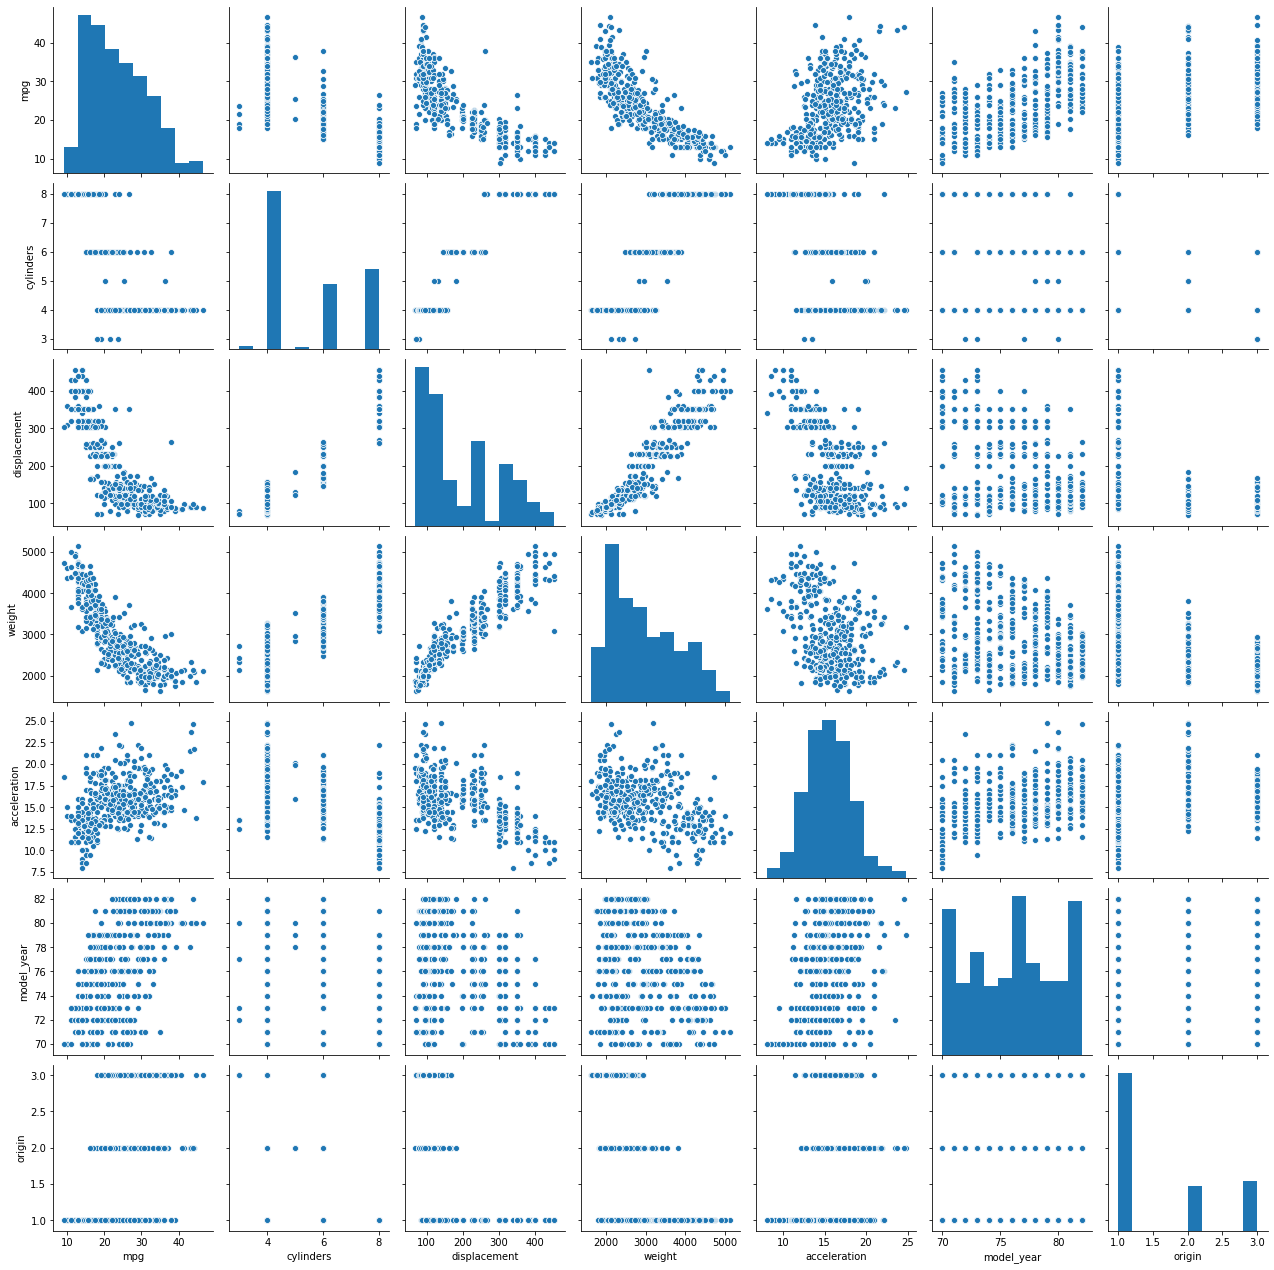

In [13]:
sns.pairplot(car)

In [15]:
car["car_make"] = car["car_name"].str.split(" ", 1).str.get(0)
car["car_model"] = car["car_name"].str.split(" ", 1).str.get(1)

In [16]:
search = "c"
boo = car["car_name"].str.startswith(search, na = False)
car[boo]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,car_make,car_model
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,chevelle malibu
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,chevrolet,impala
12,15.0,8,400.0,150,3761,9.5,70,1,chevrolet monte carlo,chevrolet,monte carlo
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20,chevy,c20
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300,chevrolet,vega 2300
35,17.0,6,250.0,100,3329,15.5,71,1,chevrolet chevelle malibu,chevrolet,chevelle malibu
38,14.0,8,350.0,165,4209,12.0,71,1,chevrolet impala,chevrolet,impala
46,22.0,4,140.0,72,2408,19.0,71,1,chevrolet vega (sw),chevrolet,vega (sw)
60,20.0,4,140.0,90,2408,19.5,72,1,chevrolet vega,chevrolet,vega
62,13.0,8,350.0,165,4274,12.0,72,1,chevrolet impala,chevrolet,impala


#### Drop unnecessary column

In [17]:
car.drop(columns=["car_make","car_name","car_model"],axis=1,inplace=True)

In [18]:
car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


### Handling missing numbers 

We have some missing values in our data. So, with median imputation, we can handle the error. This requires to be treated immediately to have a robust model.

In [14]:
car[car["horsepower"] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


We have six (6) records of missing values 


In [15]:
car = car.replace("?",np.NaN)
car["horsepower"] = car["horsepower"].astype("float")

#### Median imputation

In [16]:
median = car["horsepower"].median()
car["horsepower"].fillna(median, inplace=True)
print("Number of null values in horsepower column : {}".format(car["horsepower"].isnull().sum()))

Number of null values in horsepower column : 0


We can notice that the column is free of missing values

#### Data Visualisation

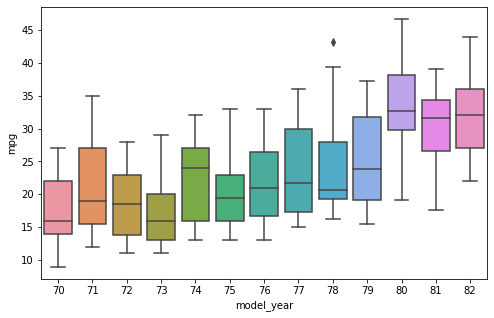

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x="model_year", y = "mpg", data=car)

In [18]:
car["car_name"].value_counts().head()

ford pinto        6
amc matador       5
toyota corolla    5
ford maverick     5
peugeot 504       4
Name: car_name, dtype: int64

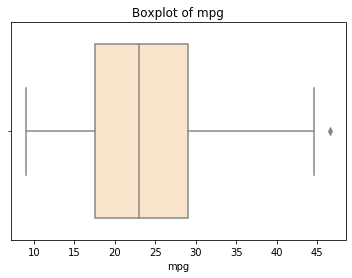

In [19]:
sns.boxplot("mpg",data=car,color="bisque")
plt.title("Boxplot of mpg")
plt.show()

#### Normality Test 

Text(0.5, 1.0, 'Q-Q plot of mpg')

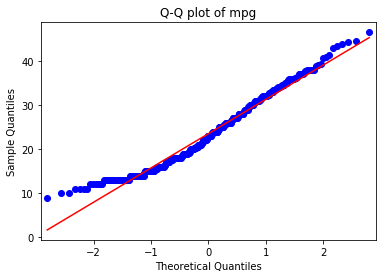

In [20]:
import statsmodels.api as sm
sm.qqplot(car["mpg"], line="r")
plt.title("Q-Q plot of mpg")

### Drop the unnecessary column

In [21]:
car.drop(columns="car_name",inplace=True)

In [22]:
from scipy.stats import shapiro

for col in car.columns:
    print([col])
    stat,p = shapiro(car[col])
    print("Statistics = %.3f, p-value = %.3f" %(stat,p))
    
    alpha = 0.05
    
    if p > 0.05:
        print ("data is normally distributed (fail to reject the null hypothesis)")
    else:
        print ("data is not normally distributed (Reject the null hypothesis)")


['mpg']
Statistics = 0.968, p-value = 0.000
data is not normally distributed (Reject the null hypothesis)
['cylinders']
Statistics = 0.749, p-value = 0.000
data is not normally distributed (Reject the null hypothesis)
['displacement']
Statistics = 0.880, p-value = 0.000
data is not normally distributed (Reject the null hypothesis)
['horsepower']
Statistics = 0.902, p-value = 0.000
data is not normally distributed (Reject the null hypothesis)
['weight']
Statistics = 0.941, p-value = 0.000
data is not normally distributed (Reject the null hypothesis)
['acceleration']
Statistics = 0.992, p-value = 0.040
data is not normally distributed (Reject the null hypothesis)
['model_year']
Statistics = 0.946, p-value = 0.000
data is not normally distributed (Reject the null hypothesis)
['origin']
Statistics = 0.674, p-value = 0.000
data is not normally distributed (Reject the null hypothesis)


Text(0.5, 1.0, 'Boxplot of the dataset')

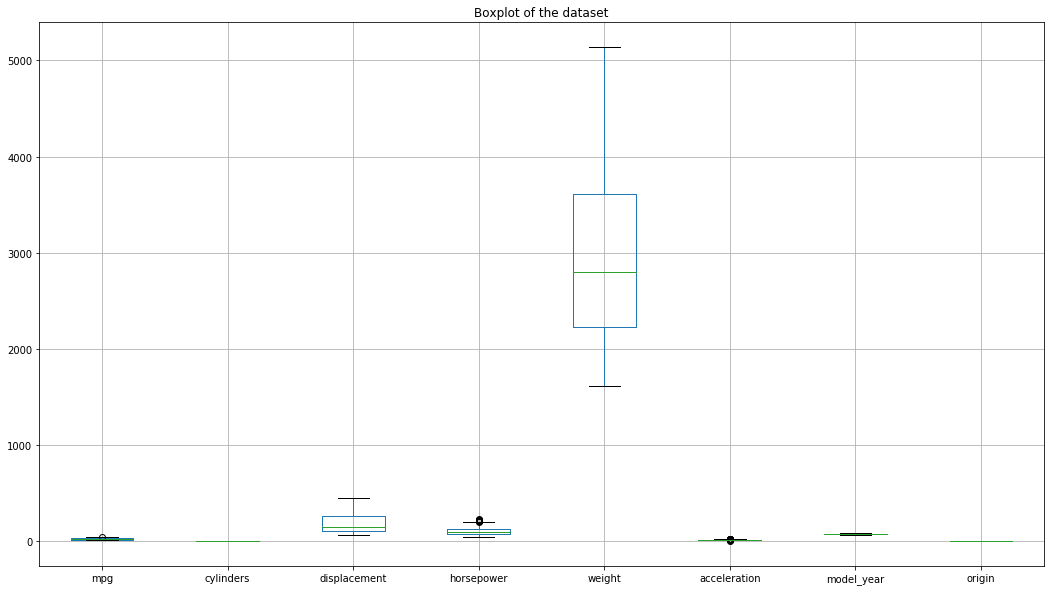

In [23]:
boxplot = car.boxplot(figsize=(18,10))
plt.title("Boxplot of the dataset")

### Inferences

- There are presence of outliers in variables including mpg, horsepower, and acceleration
- The weight variable has a higher magnitude of values and this could affect our model.

In [24]:
z_score_mpg = (car["mpg"] - car["mpg"].mean())/ car["mpg"].std()
z_score_mpg

0     -0.705551
1     -1.089379
2     -0.705551
3     -0.961437
4     -0.833494
         ...   
393    0.445936
394    2.620966
395    1.085650
396    0.573879
397    0.957708
Name: mpg, Length: 398, dtype: float64

Text(0.5, 0.98, 'Histogram of the numerical variables')

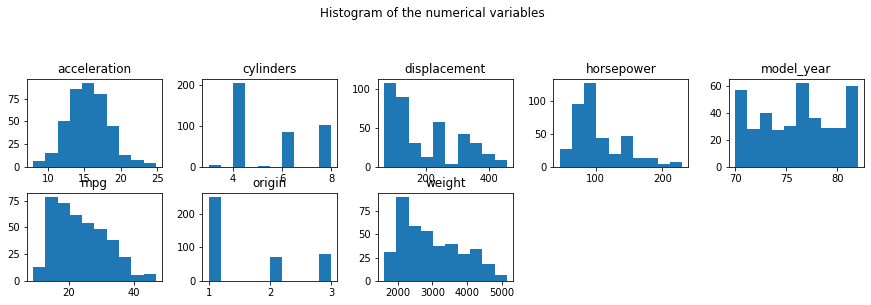

In [25]:
car.hist(layout=(5,5), figsize=(15,10),grid=False)
plt.suptitle("Histogram of the numerical variables")

#### Inferences

- The mpg variable looks normally distributed 
- Average miles per gallons is around 23.5 
- There is a presence of an outlier with the value of 46.6

In [26]:
car_origin_percentage = car["origin"].value_counts() / len(car["origin"]) * 100
car_origin_percentage.round(decimals=0)

1    63.0
3    20.0
2    18.0
Name: origin, dtype: float64

In [27]:
car["model_year"].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model_year, dtype: int64

In [28]:
car_model_percentage  = car["model_year"].value_counts() / len(car["model_year"]) * 100
car_model_percentage

73    10.050251
78     9.045226
76     8.542714
82     7.788945
75     7.537688
81     7.286432
80     7.286432
79     7.286432
70     7.286432
77     7.035176
72     7.035176
71     7.035176
74     6.783920
Name: model_year, dtype: float64

Text(0.5, 1.0, 'The origin of the vehicles')

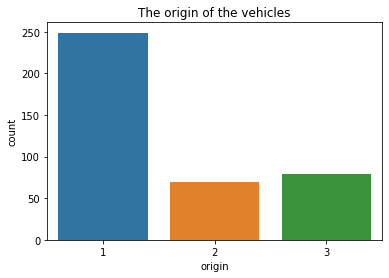

In [29]:
sns.countplot(x="origin",data=car)
plt.title("The origin of the vehicles")

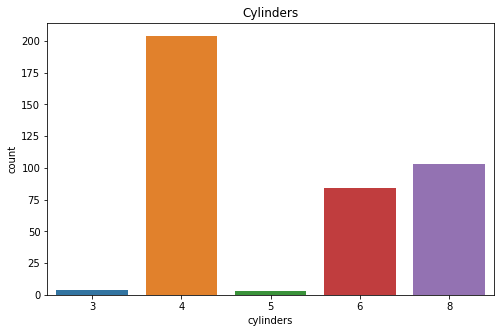

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x="cylinders",data=car)
plt.title("Cylinders")
plt.show()

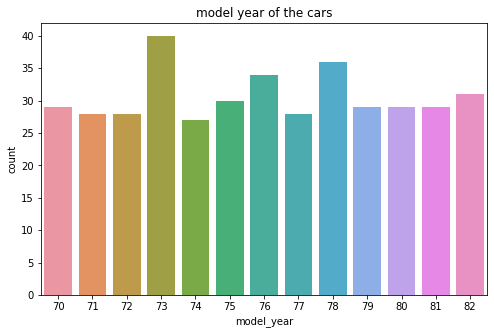

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x="model_year",data=car)
plt.title("model year of the cars")
plt.show()

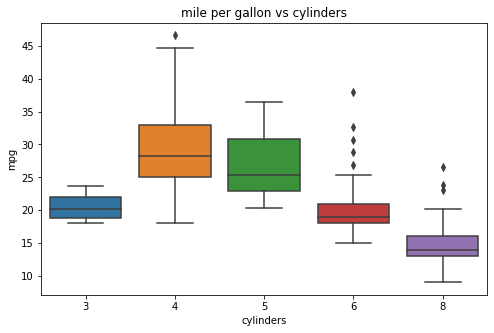

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x="cylinders", y="mpg", data=car)
plt.title("mile per gallon vs cylinders")
plt.show()

#### Insights

- It is indicated that about 63% of the car comes from a specific origin.
- Most vehicles have 4 cylinders 
- The distribution of the model year looks uniform. About 40 cars have 1970 as the model year.

In [32]:
car.loc[1:4,"mpg":]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [33]:
car[["model_year","car_name"]]

KeyError: "['car_name'] not in index"

In [21]:
car.sort_values(by=["car_name"], ascending= True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
96,13.0,8,360.0,175,3821,11.0,73,1,amc ambassador brougham
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
66,17.0,8,304.0,150,3672,11.5,72,1,amc ambassador sst
315,24.3,4,151.0,90,3003,20.1,80,1,amc concord
257,19.4,6,232.0,90,3210,17.2,78,1,amc concord
...,...,...,...,...,...,...,...,...,...
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
309,41.5,4,98.0,76,2144,14.7,80,2,vw rabbit
197,29.0,4,90.0,70,1937,14.2,76,2,vw rabbit
325,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)


In [33]:
numerical_feature = car.select_dtypes(exclude=object)
categorical_feature = car.select_dtypes(include=object)

print("numerical_feat: ", *numerical_feature)
print("cat_feature: " , *categorical_feature)

numerical_feat:  mpg cylinders displacement horsepower weight acceleration model_year origin
cat_feature: 


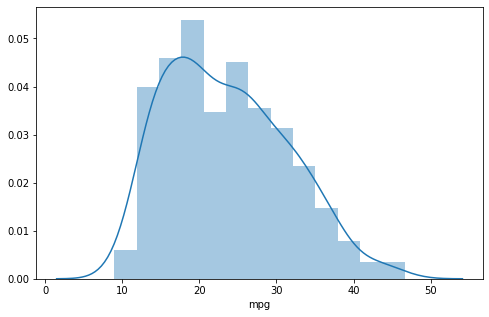

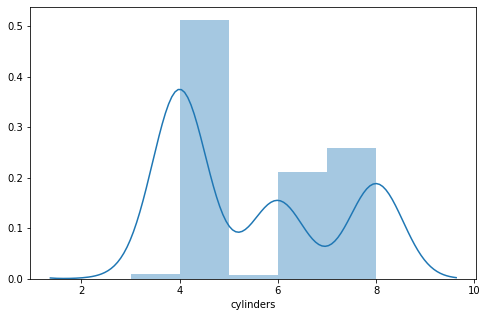

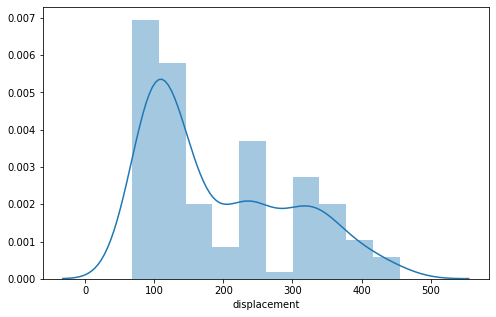

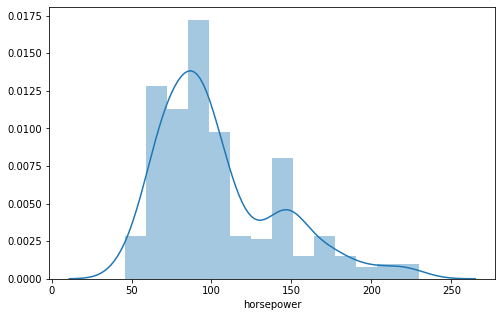

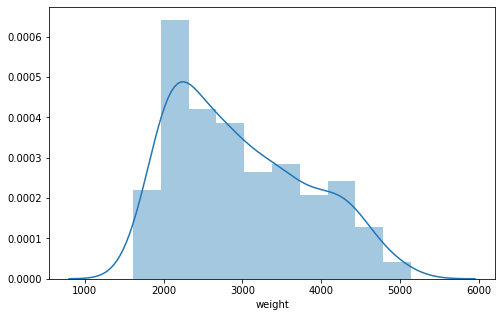

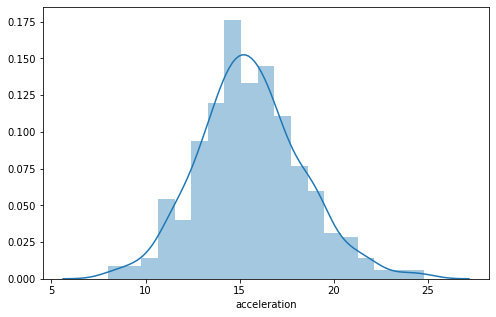

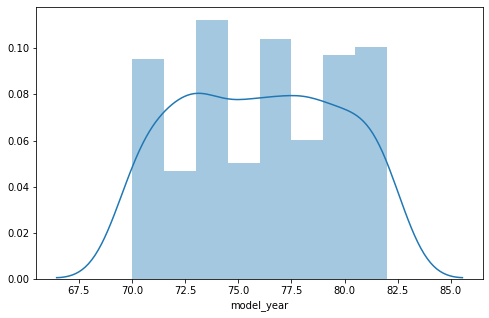

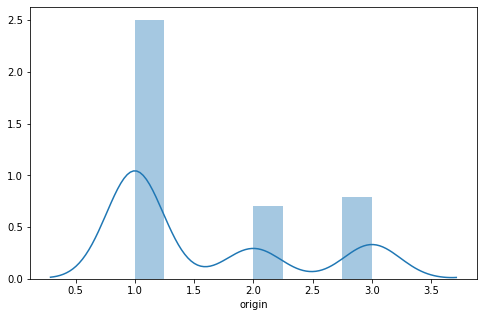

In [34]:
for col in numerical_feature.columns:
    plt.figure(figsize=(8,5))
    sns.distplot(car[col])
    plt.show()

There seems to be a few normally distributed variables. Acceleration and mpg looks normal. In contrast, weight, displacement, origin, model year are very far from being normally distributed.

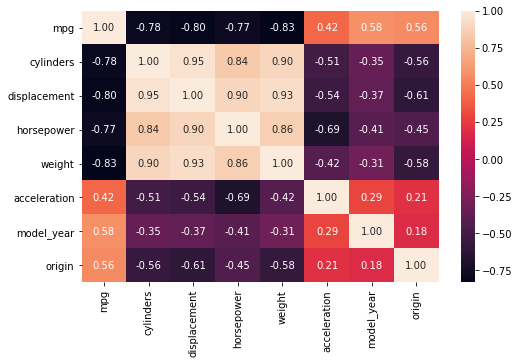

In [35]:
car_cor = car.corr(method="pearson")
plt.subplots(figsize=(8,5))
sns.heatmap(car_cor, annot=True, fmt=".2f")
plt.show()

From the correlation matrix plot, there seems to be a high correlation between the dependent and the sets of independent variables. We have a strong negative correlation between mpg and these features (cylinders, displacement, weight, and horsepower). In contrast, there exists a weak positive correlation between mpg and acceleration. For simplicity, mpg is negatively correlated with cylinders with a score of -0.80. Basically, this means as mpg increases, cylinders decreases and vice-versa. We see there is a high correlation between displacement and weight. This indicates multicollinearity problem as the two variables have the same influence on the target variable. Hence, we are going to remove one of them before building statistical models.

### Observations
- There is a high correlation between numerical variables. Given the nature of the variables, it is expected. Displacement is highly correlated with weight and cylinders.
- Variables like cylindeers, displacement, and weigh are inversely correlated with mpg.
- Acceleration, model year, and origin are positive correlated.This makes sense because it is apparent that lighter and faster cars have low milage.

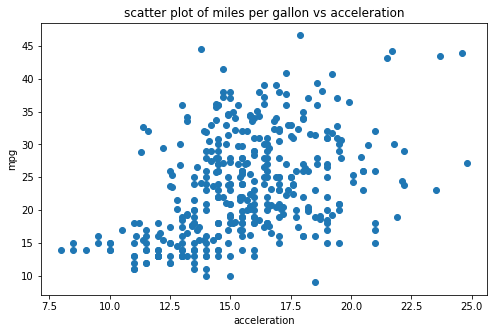

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(x="acceleration", y="mpg", data=car)
plt.xlabel("acceleration")
plt.ylabel("mpg")
plt.title("scatter plot of miles per gallon vs acceleration")
plt.show()

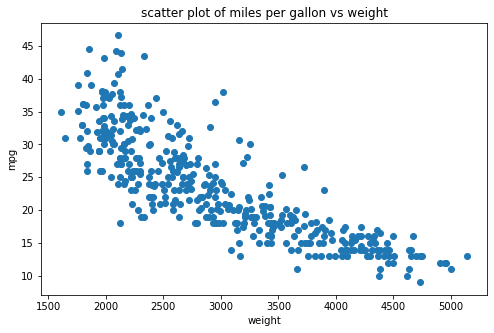

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(x="weight", y="mpg", data=car)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("scatter plot of miles per gallon vs weight")
plt.show()

To have a good understanding of the relationship between variables, we decided to visualise the association with a scatter plot. Hence, from the two plots above, we can see that there is a positive correlation between mpg and acceleration. In contrast, there exist a negative correlation between the target and weight.

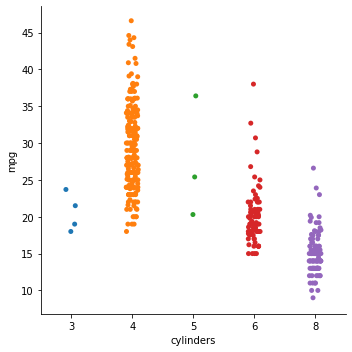

In [38]:
sns.catplot(x="cylinders",y="mpg",data=car)

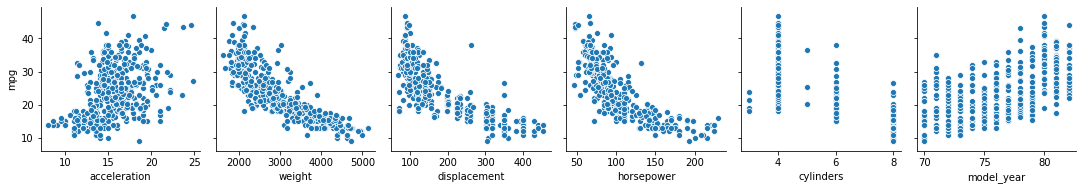

In [39]:
sns.pairplot(car, kind="scatter", x_vars=["acceleration","weight","displacement","horsepower","cylinders","model_year"], y_vars="mpg",diag_kind="auto")

It is clear that there is negative correlation between mpg and weight, displacement,and horsepower.

### Dividing the dataset into target and explanatory variables

In [40]:
features = car.iloc[:,1:8]
target = car["mpg"]

In [41]:
features.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [42]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

#### Building Models

In this section, we are going to build some baseline models to see how accurate to predict miles per gallons. We are going to implement multiple linear regression, random forest, and support vector machine. 

In [43]:
# Import data modelling libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

Before building models, we need to some extraction by splitting our data into target and independent variables. Hence, we would split the dataset into training and testing set.

In [44]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.20, random_state = 0)

In [45]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
64,8,318.0,150.0,4135,13.5,72,1
55,4,97.0,60.0,1834,19.0,71,2
317,4,97.0,78.0,2188,15.8,80,2
102,4,97.0,46.0,1950,21.0,73,2
358,4,120.0,74.0,2635,18.3,81,3


In [46]:
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
65,8,351.0,153.0,4129,13.0,72,1
132,4,140.0,75.0,2542,17.0,74,1
74,8,302.0,140.0,4294,16.0,72,1
78,4,120.0,87.0,2979,19.5,72,2
37,6,232.0,100.0,3288,15.5,71,1


### Feature Scaling

For this part, we can see that amongst our variables there are columns with higher values than the other. Hence, this will cause confusion for our machine models because it tends to create a bias result towards the variables with higher magnitude. For our machine to generalize well and produce good accuracy, we need to scale the data so they can be in the same range. This, we would implement standard scaling as the feature scaling technique.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Multiple Linear Regression 

In [48]:
# Multiple linear regression
model = LinearRegression()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)


model_mse = mean_squared_error(y_test, model_pred)
model_rmse = np.sqrt(mean_squared_error(y_test,model_pred))
r2_model = (r2_score(y_test, model_pred)*100).round(2)

print(model_mse)
print(model_rmse)
print(f"regression score of linear regression is: {r2_model}")

11.454792012258503
3.3844928737195628
regression score of linear regression is: 81.95


Feature: 0, Score: -0.67811
Feature: 1, Score: 2.19964
Feature: 2, Score: -0.74854
Feature: 3, Score: -5.43648
Feature: 4, Score: 0.52300
Feature: 5, Score: 2.71797
Feature: 6, Score: 1.26779


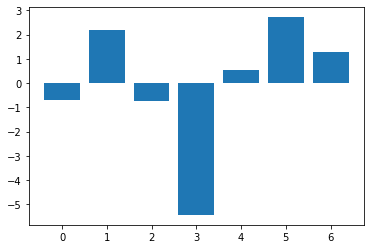

In [49]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [50]:
pd.DataFrame({"Actual":y_test, "Predicted":model_pred},).head()

,Actual,Predicted
65,14.0,12.939770
132,25.0,24.061661
74,13.0,11.668693
78,21.0,21.143491
37,18.0,17.403843


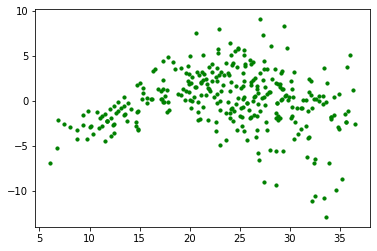

In [51]:
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

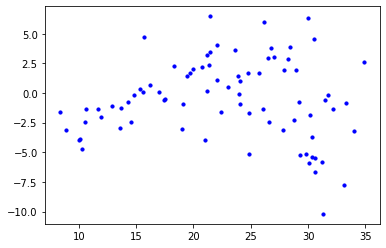

In [52]:
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

#### Random Forest Regressor 

In [53]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

RF_mse = mean_squared_error(y_test, RF_pred)
RF_rmse = np.sqrt(mean_squared_error(y_test, RF_pred))
r2_RF = (r2_score(y_test, RF_pred)*100).round(2)

print(RF_mse)
print(RF_rmse)
print(f"regression score of random forest regression is: {r2_RF}")

6.718138762499997
2.5919372605254156
regression score of random forest regression is: 89.41


In [54]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

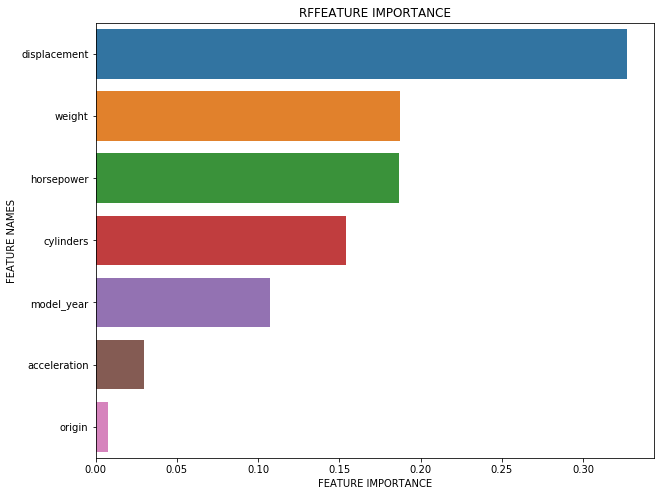

In [55]:
plot_feature_importance(RF.feature_importances_,car.columns[1:],"RF")  

We implemented feature importance class in random forest library to identify the features that are relevant for our target variable. As a result of this, it is clear that displacement is the most significant variable.

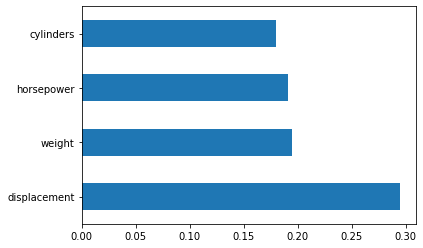

In [94]:
feat_importances = pd.Series(RF.feature_importances_,index=car.columns[1:])
feat_importances.nlargest(4).plot(kind='barh')

In [55]:
pd.DataFrame({"Actual":y_test, "Predicted":RF_pred}).head()

,Actual,Predicted
65,14.0,14.145
132,25.0,24.440
74,13.0,14.520
78,21.0,20.998
37,18.0,18.359


#### Support Vector Regression

Support vector regression is a machine learning/statistical methods for examining the linear relationship between two or continous variables.

In [56]:
svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

svm_mse = mean_squared_error(y_test, svm_pred)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
r2_svm = (r2_score(y_test, svm_pred)*100).round(2)

print(svm_mse)
print(svm_rmse)
print(f"regression score of support vector regressor is: {r2_svm}")

8.87958266223654
2.9798628596357486
regression score of support vector regressor is: 86.01


In [57]:
pd.DataFrame({"Actual":y_test, "Predicted":svm_pred}).head()

,Actual,Predicted
65,14.0,13.617135
132,25.0,24.048585
74,13.0,14.575978
78,21.0,22.084183
37,18.0,17.916143


#### Model Presentation

In [58]:
Model_names = ["LINEAR","RANDOM FOREST", "SVM"] 

Models = {"Model":Model_names, "MSE":[model_mse,RF_mse,svm_mse],
          "RMSE":[model_rmse, RF_rmse, svm_rmse],"R2":[r2_model,r2_RF,r2_svm]}

Model_result = pd.DataFrame(Models)

Model_result.sort_values(by=["MSE", "RMSE"], ascending= True, kind="quicksort")

,Model,MSE,RMSE,R2
1,RANDOM FOREST,6.718139,2.591937,89.41
2,SVM,8.879583,2.979863,86.01
0,LINEAR,11.454792,3.384493,81.95


We could see the errors generated from the baseline models were good. However, we can improve the result by optimising the parameters. There are several techniques for hyperparamter tuning, hence we would cross validation for our model tuning. It is clear random forest performed better than the other models by achieving a higher regression score and lower error.

## Hyperparameter Tuning

This section focuses on various ways we would improve our models. We would perform feature engineering techniques such as feature selection and cross validation. 

### Feature Engineering


#### One Hot Encoding

In [59]:
cat_columns = ["cylinders","origin"]

for col in cat_columns:
    dummy = pd.get_dummies(car[col], prefix=col)
    
    car = pd.concat([car, dummy], axis=1).drop(columns=col)
    
car.head()

,mpg,displacement,horsepower,weight,acceleration,model_year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0


In [60]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   cylinders_3   398 non-null    uint8  
 7   cylinders_4   398 non-null    uint8  
 8   cylinders_5   398 non-null    uint8  
 9   cylinders_6   398 non-null    uint8  
 10  cylinders_8   398 non-null    uint8  
 11  origin_1      398 non-null    uint8  
 12  origin_2      398 non-null    uint8  
 13  origin_3      398 non-null    uint8  
dtypes: float64(4), int64(2), uint8(8)
memory usage: 21.9 KB


#### Feature Selection 
This part aims at identifying and selecting relevant variables that will be moved forward for building models. From the correlation matrix, we notice that there is multicollinearity among variables. We are going to tackle to tackle the issues below.

In [60]:
cols_to_drop = ["origin","model_year","acceleration"]

In [64]:
car.drop(cols_to_drop,axis=1,inplace=True)

In [63]:
X = car.drop("mpg", axis=1)
y = car["mpg"]

In [64]:
X.head()

,displacement,horsepower,weight,acceleration,model_year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0


In [65]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

#### Splitting the dataset into training and test sets

In [66]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 0)

#### Normalizing

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
# Multiple Linear Regression
Reg = LinearRegression().fit(X_train, y_train)
pred = Reg.predict(X_test)

Reg_mse = mean_squared_error(y_test, pred)
Reg_rmse = np.sqrt(mean_squared_error(y_test, pred))
Reg_tuned_score = (r2_score(y_test, pred)*100).round(2)

print(Reg_mse)
print(Reg_rmse)
print(f"regression score of linear regression is: {Reg_tuned_score}")

9.253863627743232
3.042016375324635
regression score of linear regression is: 85.42


In [69]:
import statsmodels.api as sm
X = sm.add_constant(X)

Reg = sm.OLS(y, X).fit()

Reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     192.8
Date:                Sat, 22 May 2021   Prob (F-statistic):          2.92e-149
Time:                        14:46:07   Log-Likelihood:                -1010.3
No. Observations:                 398   AIC:                             2045.
Df Residuals:                     386   BIC:                             2092.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -10.8040      2.839     -3.805      0.000     -16.386      -5.222
displacement     0.0187      0.007      2.579      0.010       0.004       0.033
horsepower      -0.0306      0.013     -2.358      0.019      -0.056      -0.005
weight          -0.0061      0.001     -9.741      0.000      -0.007      -0.005
acceleration     0.0450      0.091      0.491      0.623      -0.135       0.225
model_year       0.7442      0.048     15.387      0.000       0.649       0.839
cylinders_3     -6.6790      1.513     -4.414      0.000      -9.654      -3.704
cylinders_4     -0.0130      0.770     -0.017      0.987      -1.527       1.501
cylinders_5      0.3457      1.715      0.202      0.840      -3.026       3.717
cylinders_6     -3.1541      0.804     -3.925      0.000      -4.734      -1.574
cylinders_8     -1.3035      1.179     -1.105      0.270      -3.623       1.015
origin_1        -5.1338      1.034     -4.963      0.000      -7.168      -3.100
origin_2        -3.1585      0.945     -3.343      0.001      -5.016      -1.301
origin_3        -2.5117      1.006     -2.497      0.013      -4.490      -0.534
==============================================================================
Omnibus:                       41.065   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.622
Skew:                           0.628   Prob(JB):                     1.70e-16
Kurtosis:                       4.674   Cond. No.                     4.66e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We achieved a good regression score of 0.87 however, it is clear that some variables are not statistically significant. Hence, we are going to remove them.

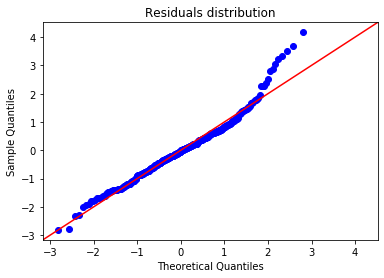

In [70]:
# residuals plot 

res = Reg.resid

fig = sm.qqplot(res, fit=True, line="45")
plt.title("Residuals distribution")
plt.show()

The residual deviated from the line a bit. However, we can assume that the assumption of linear regression model of normality is met.

#### Random Forest Regressor

In [71]:
RF_tuned = RandomForestRegressor(n_estimators=500,
                                criterion="mse")
RF_tuned.fit(X_train, y_train)
RF_tuned_pred = RF_tuned.predict(X_test)

RF_mse_tuned = mean_squared_error(y_test, RF_tuned_pred)
RF_rmse_tuned = np.sqrt(mean_squared_error(y_test, RF_tuned_pred))
r2_RF_tuned = (r2_score(y_test, RF_tuned_pred)*100).round(2)

print(RF_mse_tuned)
print(RF_rmse_tuned)
print(f"regression score of random forest regression is: {r2_RF_tuned}")

6.371989252000015
2.5242799472324804
regression score of random forest regression is: 89.96


#### Support vector Regressor

In [72]:
from sklearn.svm import LinearSVR

In [73]:
svm_tuned = SVR()
svm_tuned.fit(X_train, y_train)
svm_tuned_pred = svm_tuned.predict(X_test)

svm_mse_tuned = mean_squared_error(y_test, svm_tuned_pred)
svm_rmse_tuned = np.sqrt(mean_squared_error(y_test, svm_tuned_pred))
r2_svm_tuned = (r2_score(y_test, svm_tuned_pred)*100).round(2)

print(svm_mse_tuned)
print(svm_rmse_tuned)
print(f"regression score of support vector regressor is: {r2_svm_tuned}")

9.934056271464565
3.1518337950254556
regression score of support vector regressor is: 84.35


## Conclusion

For the baseline models, random forest happens to produce the best model. However, we tried to see if we could improve the result. Hence, we optimised it by removing some irrelevant variables. As a result, our linear regression model increased slightly after fine tuning it. In contrast, support vector regressor decreased. Additionally, random forest produced a 90 regression score, making it the best model. Our results comparison would be shown below.

In [74]:
Model_names = ["LINEAR","RANDOM FOREST", "SVM"] 

Models = {"Model":Model_names, "MSE":[model_mse,RF_mse,svm_mse],
          "RMSE":[model_rmse, RF_rmse, svm_rmse],"R2":[r2_model,r2_RF,r2_svm],"MSE_tuned":[Reg_mse,RF_mse_tuned,svm_mse_tuned],
         "RMSE_tuned":[Reg_rmse,RF_rmse_tuned,svm_rmse_tuned],"R2_tuned":[Reg_tuned_score,r2_RF_tuned,r2_svm_tuned]}

Model_result = pd.DataFrame(Models)

Model_result.sort_values(by=["MSE", "RMSE"], ascending= True, kind="quicksort")

,Model,MSE,RMSE,R2,MSE_tuned,RMSE_tuned,R2_tuned
1,RANDOM FOREST,6.718139,2.591937,89.41,6.371989,2.524280,89.96
2,SVM,8.879583,2.979863,86.01,9.934056,3.151834,84.35
0,LINEAR,11.454792,3.384493,81.95,9.253864,3.042016,85.42
